<a href="https://colab.research.google.com/github/faridelya/Pandas-Seaborn-Numpy/blob/main/A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
# uploaded = files.upload()
uploaded1 = files.upload()


Saving station_rio.csv to station_rio.csv


In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_rows', 900000)
pd.set_option('display.max_columns', 50)


In [ ]:
covd = pd.read_csv(io.BytesIO(uploaded['us_counties_covid19_daily.csv']))
rio = pd.read_csv(io.BytesIO(uploaded1['station_rio.csv']))

In [ ]:
rio.head(10)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1973,27.73,27.97,25.70,26.49,22.42,22.76,22.14,21.03,21.46,22.46,23.06,25.85,27.45,24.87,21.98,22.33,24.16
1,1974,26.68,27.16,26.56,23.94,22.76,20.70,21.20,21.81,22.91,22.80,24.51,24.54,26.56,24.42,21.24,23.41,23.91
2,1975,25.27,26.92,26.43,22.82,21.37,20.50,19.68,22.98,22.40,22.65,24.11,26.53,25.58,23.54,21.05,23.05,23.31
3,1976,27.48,26.20,25.55,24.99,22.01,21.18,20.14,21.15,21.27,22.06,24.40,25.56,26.74,24.18,20.82,22.58,23.58
4,1977,27.13,28.51,26.88,24.22,22.35,22.13,23.07,22.29,22.44,23.92,24.48,24.84,27.07,24.48,22.50,23.61,24.42
5,1978,27.44,26.55,26.42,23.39,21.85,20.03,21.94,21.28,22.49,23.51,25.00,25.66,26.28,23.89,21.08,23.67,23.73
6,1979,23.86,25.69,24.80,23.36,23.05,20.30,20.29,22.42,22.05,24.25,24.07,26.02,25.07,23.74,21.00,23.46,23.32
7,1980,25.39,27.24,27.83,24.63,23.41,21.20,21.81,22.22,21.05,23.10,24.20,27.01,26.22,25.29,21.74,22.78,24.01
8,1981,27.42,28.06,26.26,23.85,22.87,20.94,19.90,21.50,23.19,22.49,25.25,25.73,27.50,24.33,20.78,23.64,24.06
9,1982,24.55,27.51,25.00,22.73,21.58,22.44,21.30,22.34,22.41,23.50,26.15,24.98,25.93,23.10,22.03,24.02,23.77


# **Task 1**
## Reshape the data so that the year, month, and temperature measurements are presented in three columns. In other words, reshape the data so that each month is not represented in a separate column.

In [ ]:
new_rio = rio.melt(id_vars=['YEAR','metANN','D-J-F', 'M-A-M', 'J-J-A', 'S-O-N'], var_name='Month',
    value_name='temp')

In [ ]:
thr_col = new_rio[['YEAR','Month',"temp"]]

In [ ]:
thr_col.head(5)

,YEAR,Month,temp
0,1973,JAN,27.73
1,1974,JAN,26.68
2,1975,JAN,25.27
3,1976,JAN,27.48
4,1977,JAN,27.13


# Task 2
## Remove any rows that have missing data. The missing code in the datasets is 999.9. 

In [ ]:
# before removal 
new_rio.shape

(564, 8)

In [ ]:
# missing values count
new_rio[new_rio["temp"] == 999.9].shape[0]   

47

In [ ]:
#after removal shape
new_rio.drop(new_rio.index[new_rio['temp'] == 999.9], inplace=True);
new_rio.shape

(517, 8)

# Task 3. 
## Create a new column to recode the months into seasons. DEC, JAN, and FEB should be recoded to “SUMMER”; MAR, APR, and MAY, should be coded to “FALL”; JUN, JUL, and AUG should be coded to “WINTER”; and SEP, OCT, and NOV should be coded to “SPRING”. 

In [ ]:
sum = ['DEC','JAN','FEB']
fall =['MAR','APR','MAY']
wint = ['JUN','JUL','AUG']
sprng= ['SEP','OCT','NOV']

def recode(x):
    if x in sum:
        return 'SUMMER'
    if x in fall:
        return 'FALL'
    elif x in wint:
        return 'WINTER'
    else:
        return 'SPRING'

new_rio['seasons'] = new_rio['Month'].apply(lambda x: recode(x))

In [ ]:
new_rio[['YEAR','metANN','Month','seasons']].head(5)

,YEAR,metANN,Month,seasons
0,1973,24.16,JAN,SUMMER
1,1974,23.91,JAN,SUMMER
2,1975,23.31,JAN,SUMMER
3,1976,23.58,JAN,SUMMER
4,1977,24.42,JAN,SUMMER


# Task 4: 
## Aggregate the data to obtain yearly median temperatures from the monthly data. 

In [ ]:
new_rio.groupby('YEAR')['temp'].median()

YEAR
1973    22.910
1974    23.425
1975    22.900
1976    23.230
1977    24.070
1978    23.450
1979    23.610
1980    23.805
1981    23.520
1982    23.115
1983    23.950
1984    24.615
1985    25.530
1986    24.400
1987    23.775
1988    23.135
1989    23.460
1990    25.145
1991    24.040
1992    23.670
1993    26.245
1994    24.255
1995    24.435
1996    23.730
1997    24.410
1998    23.510
1999    22.905
2000    25.095
2001    23.855
2002    25.670
2003    26.940
2004    23.475
2005    24.930
2006    24.060
2007    25.070
2008    24.320
2009    24.140
2010    23.660
2011    23.475
2012    24.680
2013    23.900
2014    25.340
2015    25.330
2016    24.630
2017    25.495
2018    25.085
2019    25.050
Name: temp, dtype: float64

# Task 5  Aggregate the data to obtain seasonal medians for each year from the monthly data

In [ ]:
new_rio.groupby(['YEAR','seasons'])['temp'].median()

YEAR  seasons
1973  FALL       25.700
      SPRING     22.460
      SUMMER     27.730
      WINTER     22.140
1974  FALL       23.940
      SPRING     22.910
      SUMMER     26.680
      WINTER     21.200
1975  FALL       22.820
      SPRING     22.650
      SUMMER     26.530
      WINTER     20.500
1976  FALL       24.990
      SPRING     22.060
      SUMMER     26.200
      WINTER     21.150
1977  FALL       24.220
      SPRING     23.920
      SUMMER     27.130
      WINTER     22.290
1978  FALL       23.390
      SPRING     23.510
      SUMMER     26.550
      WINTER     21.280
1979  FALL       23.360
      SPRING     24.070
      SUMMER     25.690
      WINTER     20.300
1980  FALL       24.630
      SPRING     23.100
      SUMMER     27.010
      WINTER     21.810
1981  FALL       23.850
      SPRING     23.190
      SUMMER     27.420
      WINTER     20.940
1982  FALL       22.730
      SPRING     23.500
      SUMMER     24.980
      WINTER     22.340
1983  FALL       24.080
  

#Task 6: 
## Generate a grouped box plot to summarize the monthly data. Make sure the months are in calendar as opposed to alphabetical order

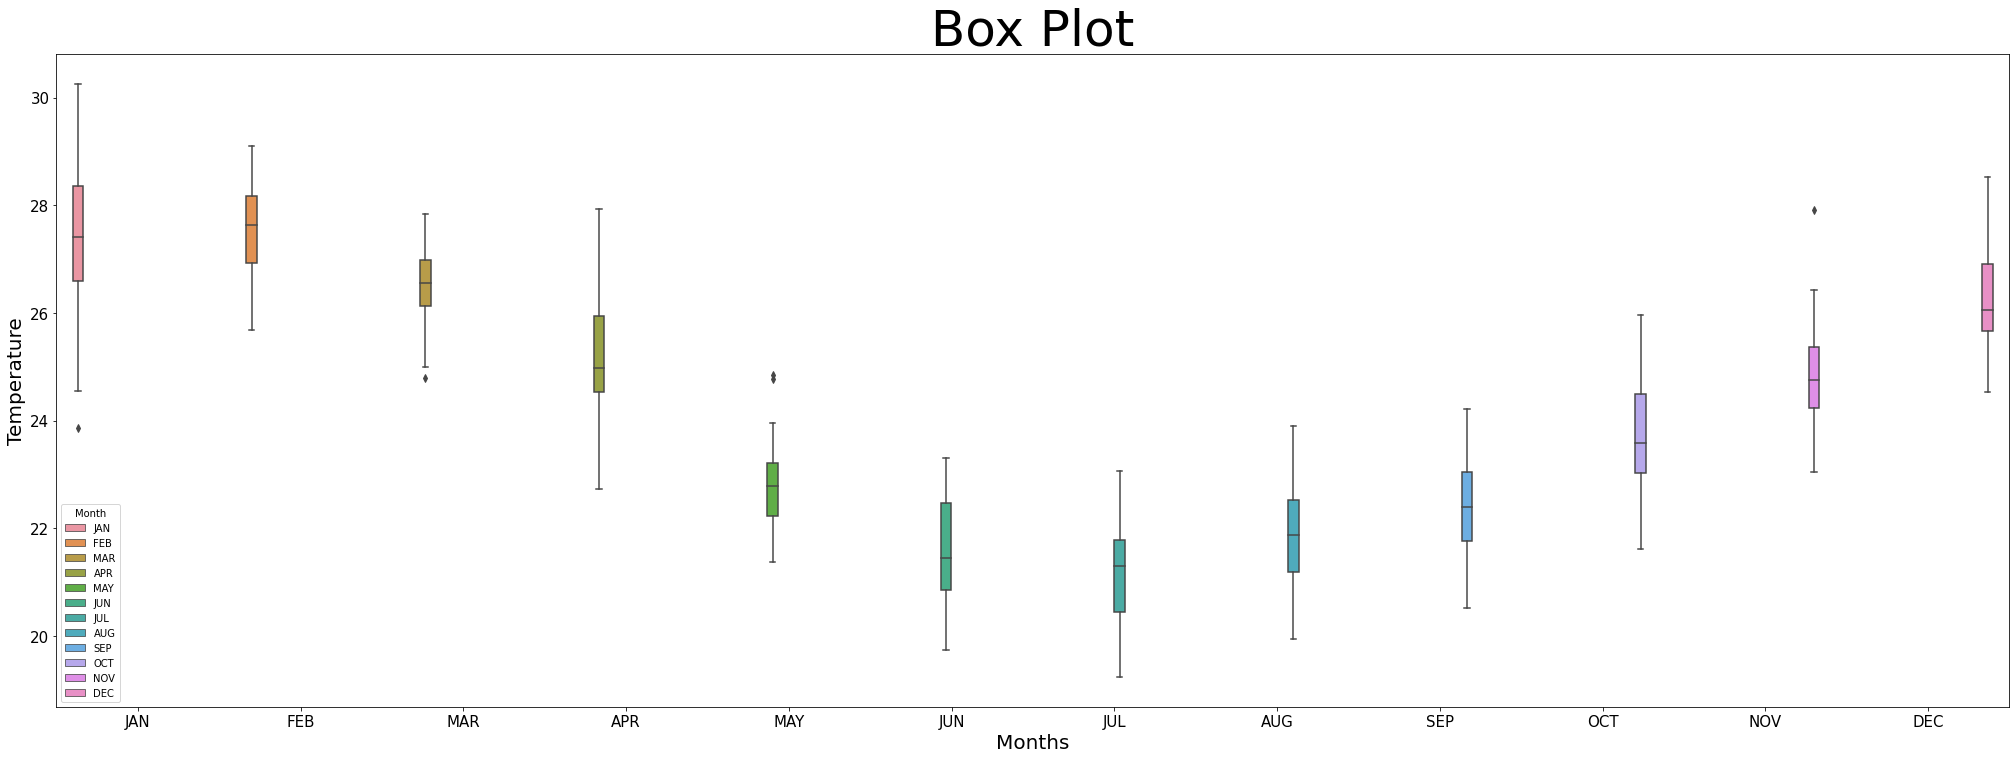

In [ ]:

fig , ax = plt.subplots(figsize=(35,12))
b=sns.boxplot(data=new_rio, x="Month", y="temp", hue="Month", ax=ax);
b.axes.set_title("Box Plot",fontsize=50)
b.set_xlabel("Months",fontsize=20)
b.set_ylabel("Temperature",fontsize=20)
b.tick_params(labelsize=15)
plt.show()

# Task 7: 
## Generate a grouped box plot to summarize the seasonal data. Make sure the seasons are in calendar order as opposed to alphabetical order.

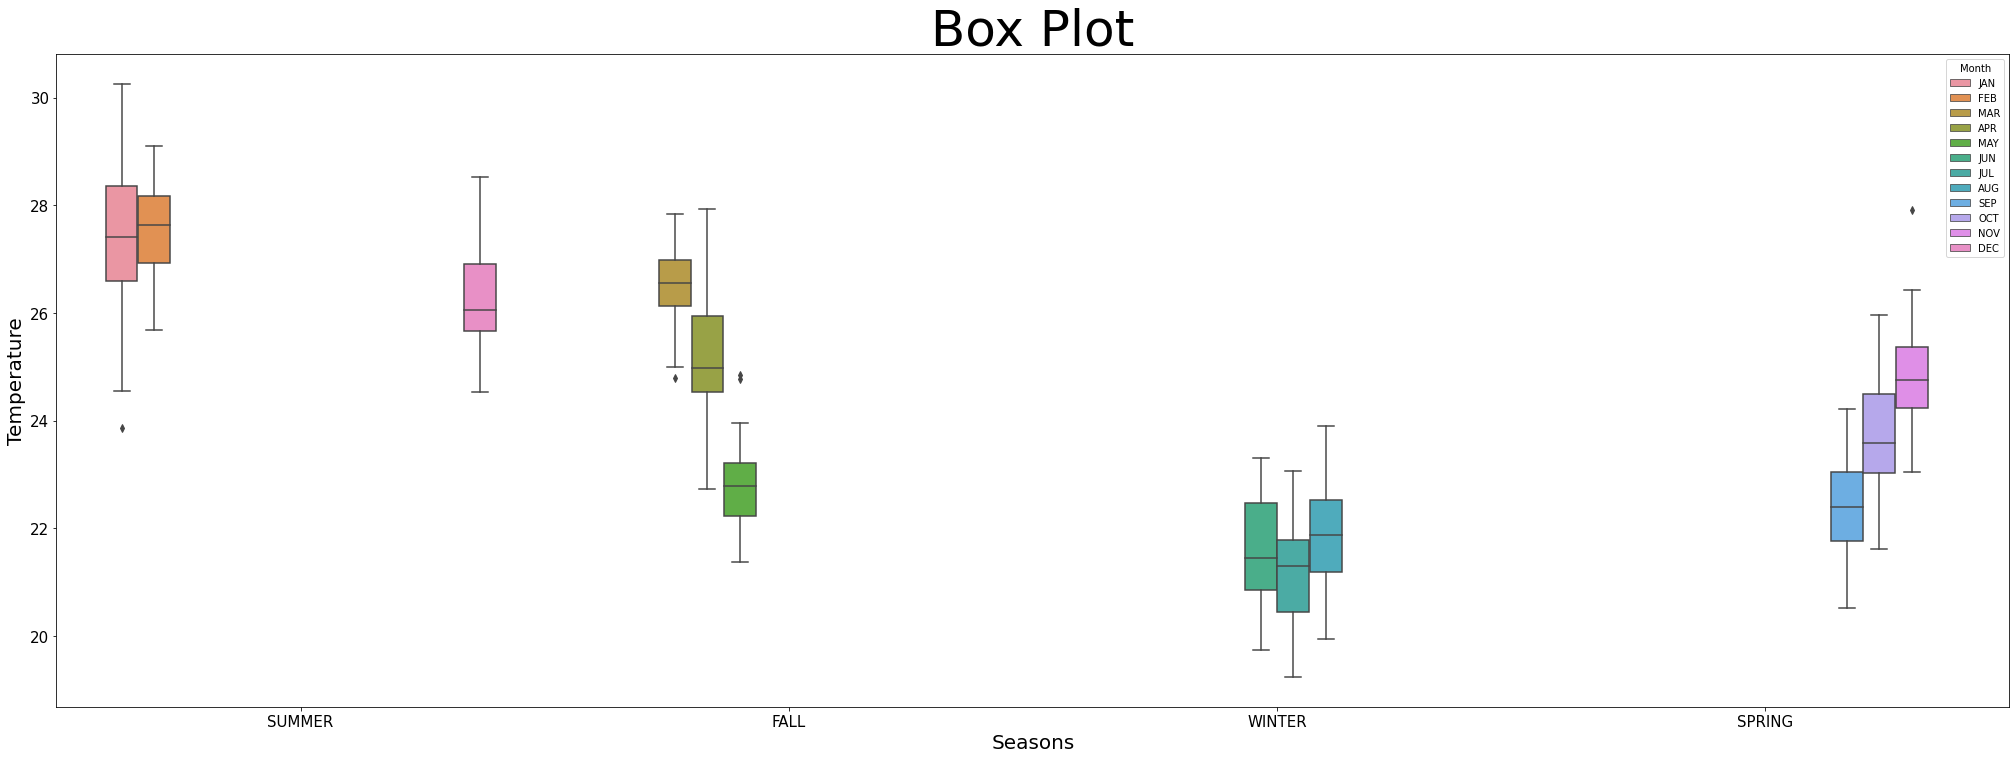

In [ ]:

fig , ax = plt.subplots(figsize=(35,12))
b=sns.boxplot(data=new_rio, x="seasons", y="temp", hue="Month", ax=ax);
b.axes.set_title("Box Plot",fontsize=50)
b.set_xlabel("Seasons",fontsize=20)
b.set_ylabel("Temperature",fontsize=20)
b.tick_params(labelsize=15)
plt.show()

# Task 8: Create a line graph or time series of yearly median temperature.

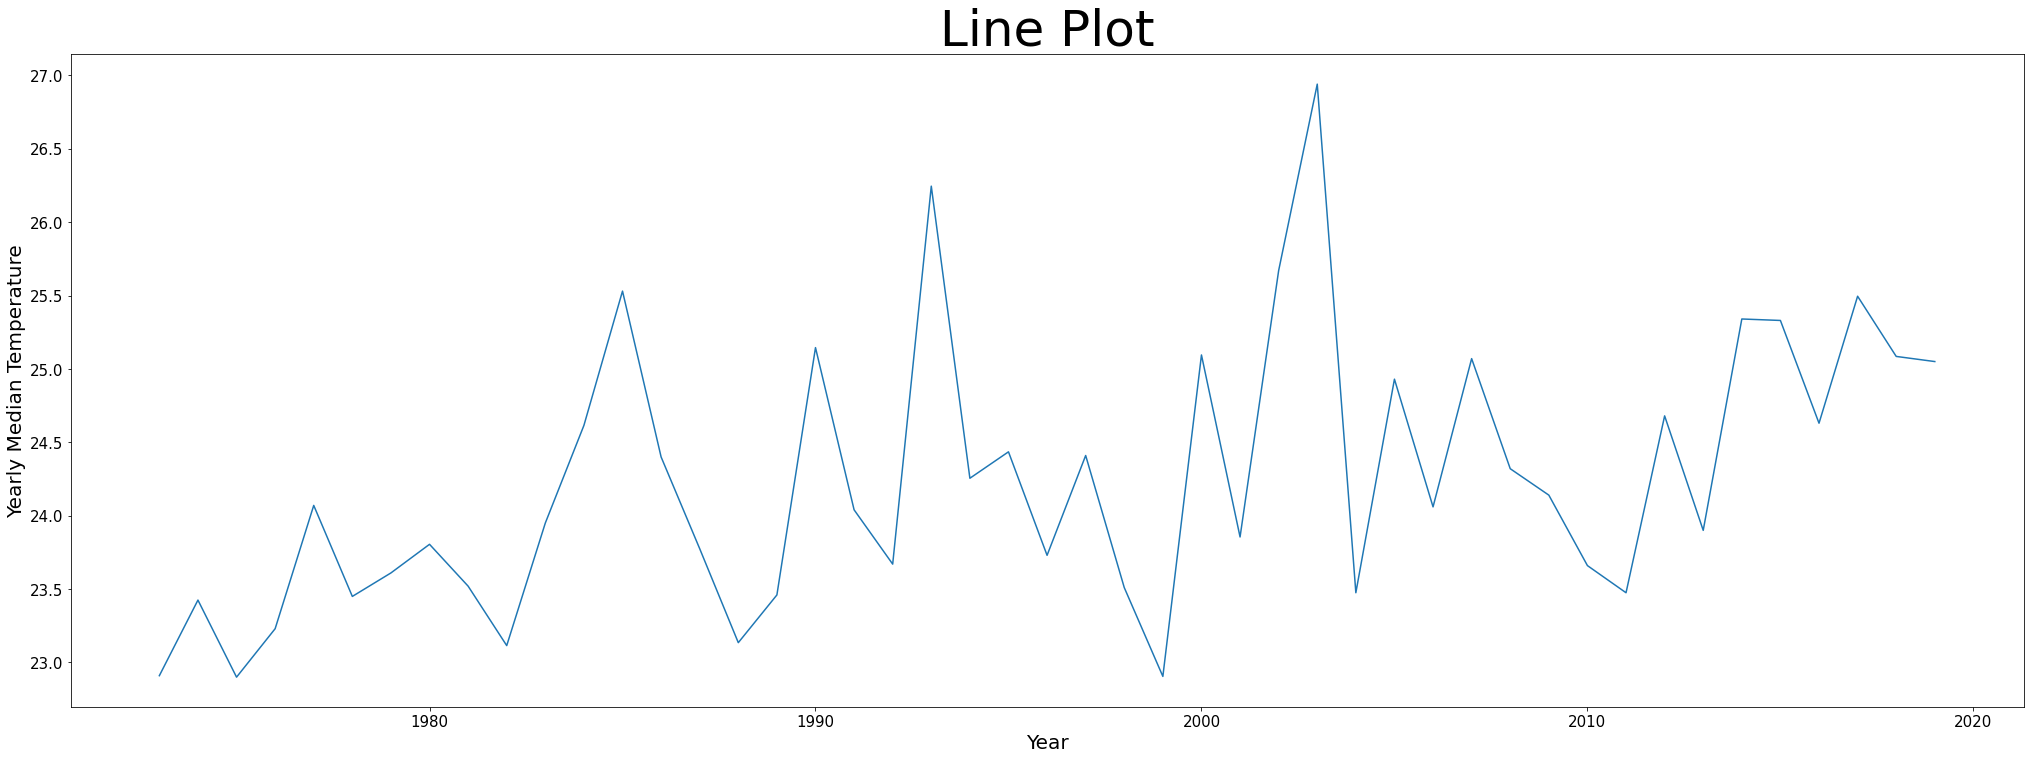

In [ ]:
yearly_med = new_rio.groupby('YEAR')['temp'].median()

fig , ax = plt.subplots(figsize=(35,12))
b=sns.lineplot(data=yearly_med,  ax=ax);
b.axes.set_title("Line Plot",fontsize=50)
b.set_xlabel("Year",fontsize=20)
b.set_ylabel("Yearly Median Temperature",fontsize=20)
b.tick_params(labelsize=15)
plt.show()

# Task 9: 
## Create a line graph or time series of seasonal median temperatures where eachline represents a different time series for each season. 

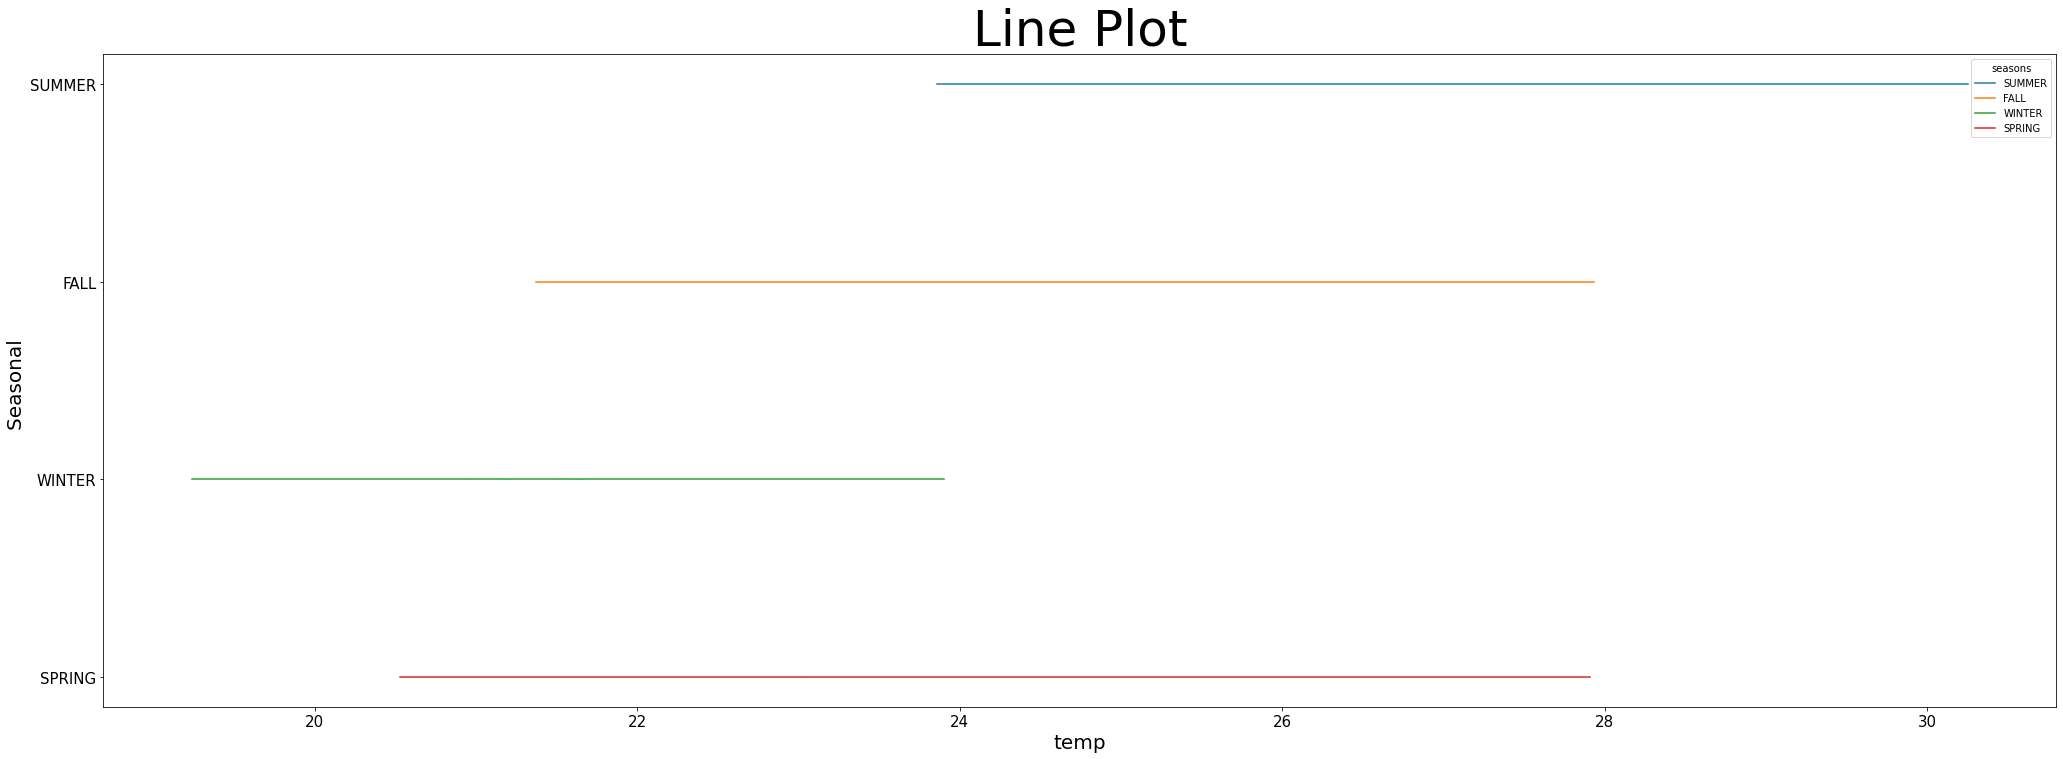

In [ ]:
fig , ax = plt.subplots(figsize=(35,12))
b=sns.lineplot(data=new_rio, x='temp',y='seasons',hue='seasons' ,ax=ax);
b.axes.set_title("Line Plot",fontsize=50)
b.set_xlabel("temp",fontsize=20)
b.set_ylabel("Seasonal ",fontsize=20)
b.tick_params(labelsize=15)
plt.show()

# Task 10: 
## Summarize your results in a paragraph. Discuss both the seasonal central tendency and seasonal variability in the data. Do these data suggest a warming trend in the city over the decades included?

# ----------------------------------- **Covid 19**----------------------------

In [ ]:
print(covd.shape)
covd.head()

(800437, 6)


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


# Task 11: 
## Aggregate the county-level data to obtain the total cumulative number of cases in the state per day. 

In [ ]:
cum_per_day_in_state = covd.groupby(['state','date'])['cases'].sum().groupby(level=0).cumsum().reset_index()
cum_per_day_in_state.head()

,state,date,cases
0,Alabama,2020-03-13,6
1,Alabama,2020-03-14,18
2,Alabama,2020-03-15,41
3,Alabama,2020-03-16,70
4,Alabama,2020-03-17,109


# Task 12: A Aggregate the county-level data to obtain the total cumulative cases for the entire United states per day

In [ ]:
covd['to_cumulative'] = covd.groupby(['date'])['cases'].apply(lambda x: x.cumsum(axis=0))
covd.head()

,date,county,state,fips,cases,deaths,to_cumulative
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,1
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,1
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,1
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,1
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,2


# Task 13: From the data aggregated by state per day, extract out only the records for New York, North Dakota, and Washington

In [ ]:
ny = cum_per_day_in_state[cum_per_day_in_state['state'] == 'New York']
nd = cum_per_day_in_state[cum_per_day_in_state['state'] == 'North Dakota']
wst = cum_per_day_in_state[cum_per_day_in_state['state'] == 'Washington']
df= pd.concat([ny,nd,wst])

In [ ]:
df['state'].unique()

array(['New York', 'North Dakota', 'Washington'], dtype=object)

In [ ]:

df.head(7)

,state,date,cases
9192,New York,2020-03-01,1
9193,New York,2020-03-02,2
9194,New York,2020-03-03,4
9195,New York,2020-03-04,15
9196,New York,2020-03-05,37
9197,New York,2020-03-06,81
9198,New York,2020-03-07,170


# Task 14: Create a time series graph of cumulative cases for the entire United States over the provided time period.

In [ ]:
covd['cumulative_cases_all_united_st'] = covd['cases'].cumsum(axis=0)

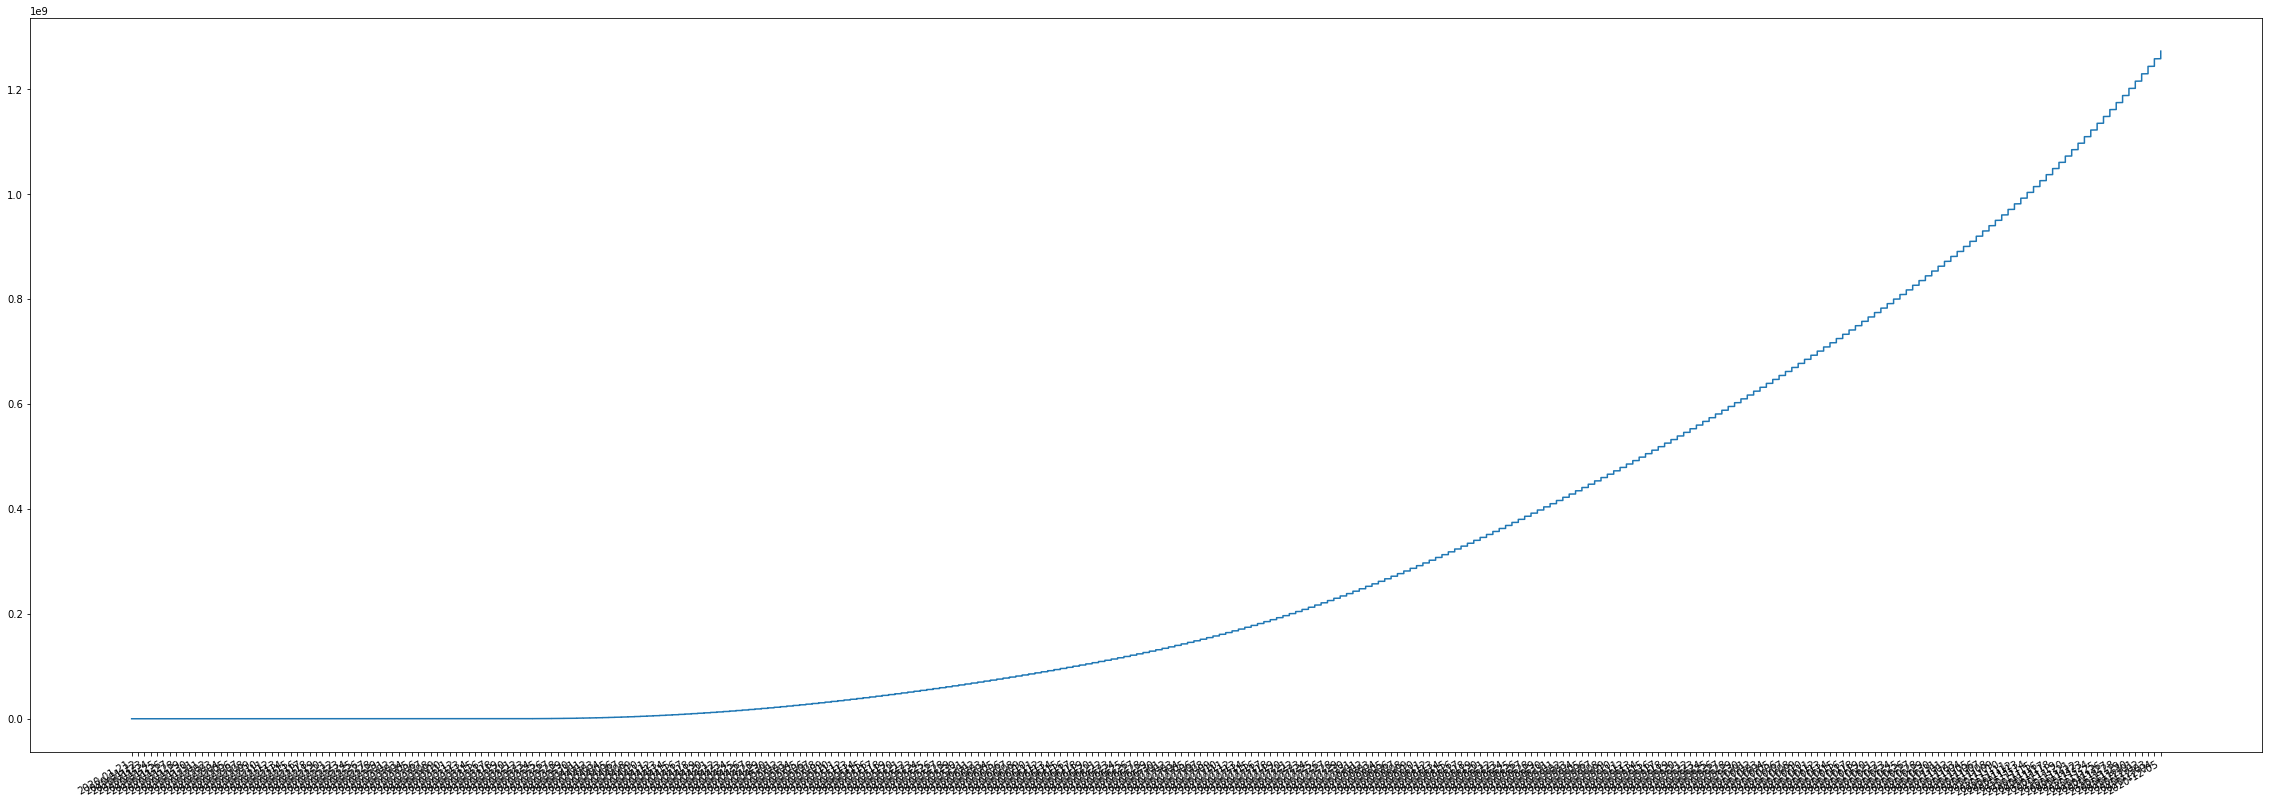

In [ ]:


fig , ax = plt.subplots(figsize=(40,15))
plt.plot(covd['date'] , covd['cumulative_cases_all_united_st'],  )
plt.gcf().autofmt_xdate()
plt.show()

# Task 15: Create a time series graph of cumulative cases for the three selected states with three separate lines to differentiate the states. 

In [ ]:
covd['state'].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

In [ ]:
ny = covd[covd['state'] == 'Pennsylvania']
ny['cumulative_cases'] = ny['cases'].cumsum(axis=0)
nd = covd[covd['state'] == 'South Carolina']
nd['cumulative_cases'] = nd['cases'].cumsum(axis=0)
wst = covd[covd['state'] == 'District of Columbia']
wst['cumulative_cases'] = wst['cases'].cumsum(axis=0);


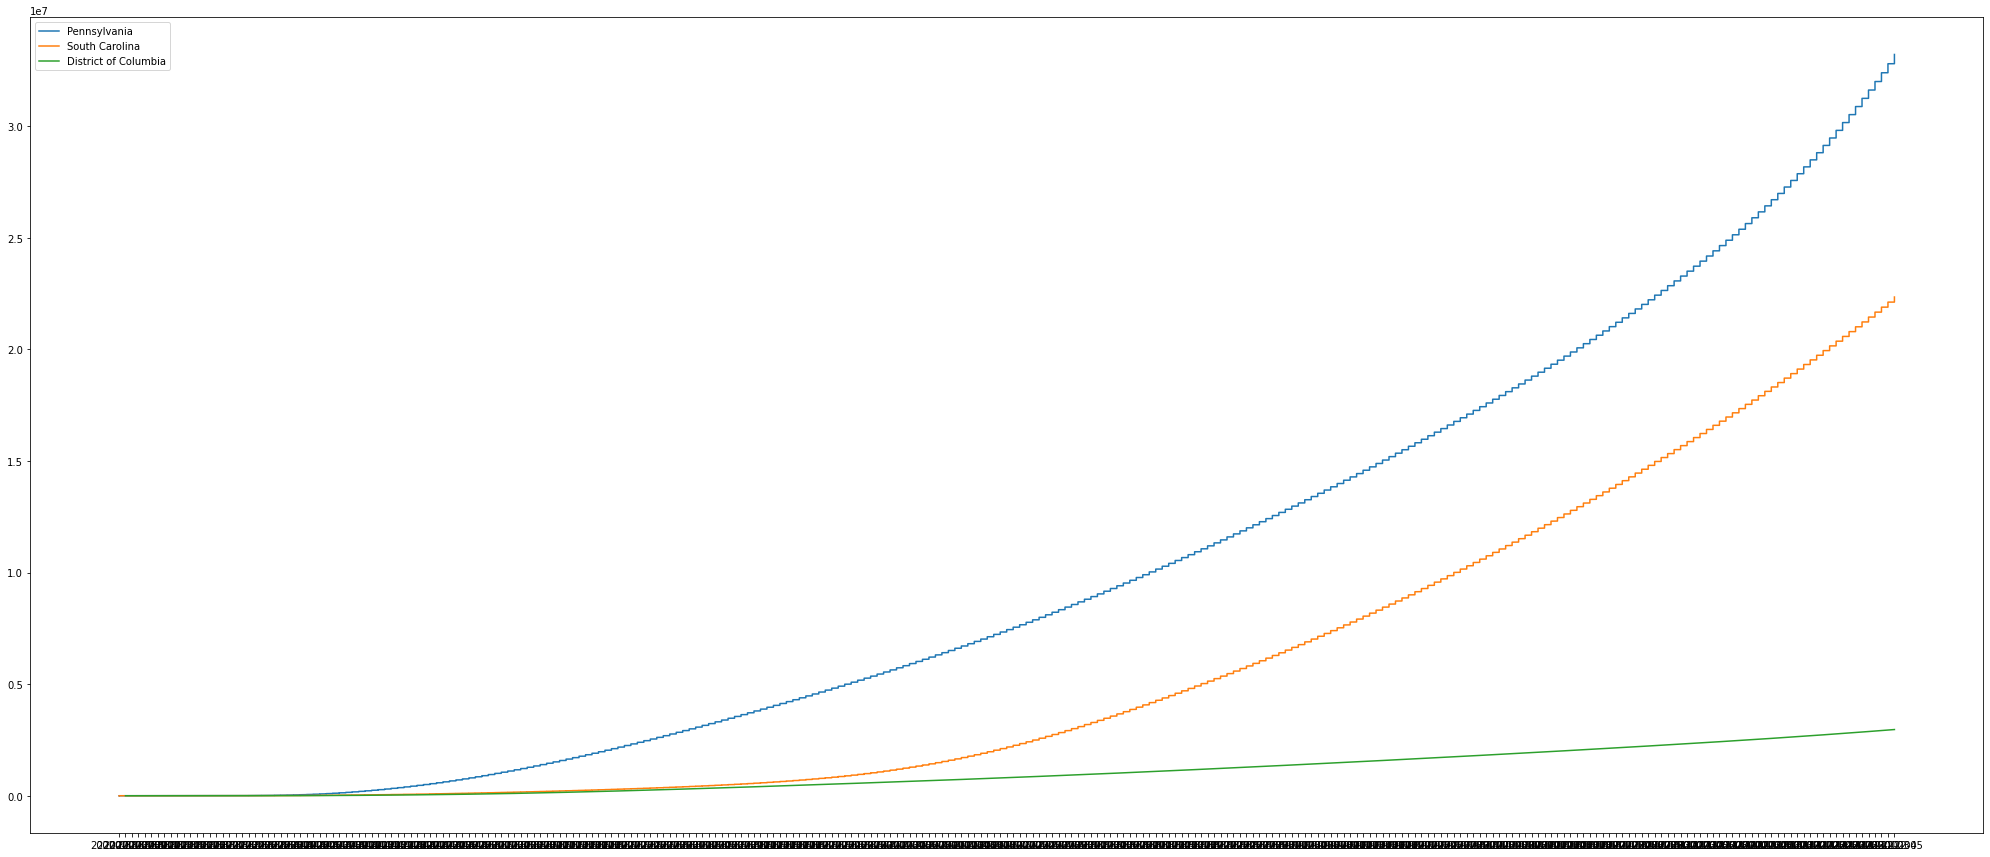

In [ ]:
fig , ax = plt.subplots(figsize=(35,15))

plt.plot(ny['date'],ny['cumulative_cases']  )
plt.plot(nd['date'],nd['cumulative_cases']  )
plt.plot(wst['date'],wst['cumulative_cases']  )
plt.legend(['Pennsylvania','South Carolina','District of Columbia'])
plt.show()

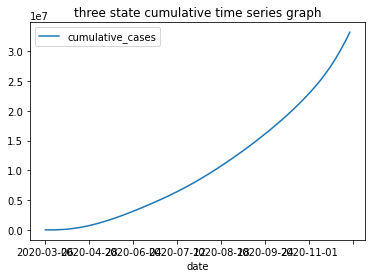

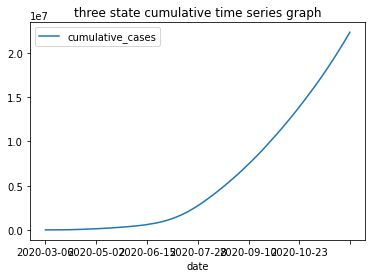

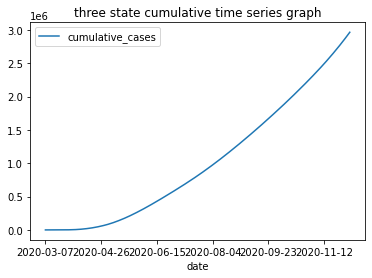

In [ ]:

ny.plot(x='date',y = 'cumulative_cases',title="three state cumulative time series graph") ;
nd.plot(x='date',y = 'cumulative_cases',title="three state cumulative time series graph") ;
wst.plot(x='date',y = 'cumulative_cases',title="three state cumulative time series graph") ;


# Task 16: Write a paragraph to compare the three states that were graphed in regards to when COVID-19 became prominent and how fast the number of cases grew.

In [ ]:
# here write paragraph